In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
df = pd.read_csv("student_placement_dataset.csv")
df.head()

,age,highschool_gpa,college_gpa,internships,projects,certifications,hackathons,communication_skills,technical_skills,aptitude_score,coding_score,attendance_percentage,backlogs,volunteering,english_proficiency,quantitative_score,logical_reasoning,extracurricular,leadership_experience,placed
0,23,2.65,2.82,0,9,3,3,7,1,49,62,80.01,0,1,8,94,75,2,1,0
1,24,2.04,3.05,2,1,2,1,10,8,75,30,96.14,3,1,9,39,67,0,0,0
2,22,3.52,3.89,0,1,4,3,8,3,60,89,82.17,2,1,2,14,76,3,0,1
3,24,2.09,3.19,0,9,4,4,2,4,96,41,78.90,2,1,6,27,74,1,1,0
4,24,3.73,3.32,3,5,3,1,7,2,50,87,62.30,4,0,6,56,79,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    6000 non-null   int64  
 1   highschool_gpa         6000 non-null   float64
 2   college_gpa            6000 non-null   float64
 3   internships            6000 non-null   int64  
 4   projects               6000 non-null   int64  
 5   certifications         6000 non-null   int64  
 6   hackathons             6000 non-null   int64  
 7   communication_skills   6000 non-null   int64  
 8   technical_skills       6000 non-null   int64  
 9   aptitude_score         6000 non-null   int64  
 10  coding_score           6000 non-null   int64  
 11  attendance_percentage  6000 non-null   float64
 12  backlogs               6000 non-null   int64  
 13  volunteering           6000 non-null   int64  
 14  english_proficiency    6000 non-null   int64  
 15  quan

In [4]:
df.sample(5)

,age,highschool_gpa,college_gpa,internships,projects,certifications,hackathons,communication_skills,technical_skills,aptitude_score,coding_score,attendance_percentage,backlogs,volunteering,english_proficiency,quantitative_score,logical_reasoning,extracurricular,leadership_experience,placed
1987,21,3.72,2.86,1,2,1,1,10,8,77,50,86.69,1,1,3,71,68,2,1,0
3769,23,3.91,2.77,2,5,5,4,10,1,68,34,54.19,4,0,8,55,61,2,1,0
5919,22,3.90,3.69,1,1,3,0,2,1,47,73,67.58,2,0,10,33,99,2,0,0
5670,23,3.25,2.80,0,2,5,2,1,1,82,59,63.68,1,0,6,72,79,0,0,0
5226,22,2.56,3.31,2,9,5,1,2,4,79,74,55.78,1,0,3,6,91,1,1,1


In [5]:
conn = sqlite3.connect("placements.db")
df.to_sql("placements", conn, if_exists="replace", index=False)

6000

In [6]:
pd.read_sql("SELECT * FROM placements LIMIT 5", conn)

,age,highschool_gpa,college_gpa,internships,projects,certifications,hackathons,communication_skills,technical_skills,aptitude_score,coding_score,attendance_percentage,backlogs,volunteering,english_proficiency,quantitative_score,logical_reasoning,extracurricular,leadership_experience,placed
0,23,2.65,2.82,0,9,3,3,7,1,49,62,80.01,0,1,8,94,75,2,1,0
1,24,2.04,3.05,2,1,2,1,10,8,75,30,96.14,3,1,9,39,67,0,0,0
2,22,3.52,3.89,0,1,4,3,8,3,60,89,82.17,2,1,2,14,76,3,0,1
3,24,2.09,3.19,0,9,4,4,2,4,96,41,78.90,2,1,6,27,74,1,1,0
4,24,3.73,3.32,3,5,3,1,7,2,50,87,62.30,4,0,6,56,79,0,1,1


In [7]:
pd.read_sql("""
SELECT COUNT(*) AS placed_students
FROM placements
WHERE placed = '1'
""",conn)

,placed_students
0,2104


In [12]:
pd.read_sql("""
SELECT 
ROUND ( 100.0 * SUM(CASE WHEN placed = 1 THEN 1 ELSE 0 END) / COUNT(*), 
 2
) AS placement_percentage
FROM placements
""",conn)

,placement_percentage
0,35.07


In [35]:
gpa_df = pd.read_sql("""
SELECT 
CASE
    WHEN college_gpa >=3.5 THEN 'HIGH GPA'
    WHEN college_gpa >=2.5 THEN 'MEDIUM GPA'
    ELSE 'LOW GPA'
END AS gpa_group,
COUNT(*) AS students,
ROUND(100.0 * SUM(placed) / COUNT(*),2) AS placement_rate
FROM placements
GROUP BY gpa_group

""",conn)

In [39]:
intern_df = pd.read_sql("""
SELECT
internships,
COUNT(*) AS students,
ROUND(100.0 * SUM(placed)/COUNT(*),2) AS placement_rate
FROM placements
GROUP BY internships
ORDER BY internships

""",conn)

In [43]:
skills_df = pd.read_sql("""
SELECT
technical_skills,
COUNT(*) AS students,
ROUND(100.0 * SUM(placed)/COUNT(*),2) AS placement_rate
FROM placements
GROUP BY technical_skills
""",conn)

In [34]:
pd.read_sql("""
SELECT 
projects,
ROUND(100.0 * SUM(placed) / COUNT(*), 2) AS placement_rate
FROM placements
GROUP BY projects
ORDER BY projects
""", conn)


,projects,placement_rate
0,1,29.64
1,2,32.68
2,3,35.12
3,4,37.14
4,5,34.46
5,6,36.24
6,7,37.80
7,8,34.86
8,9,37.20


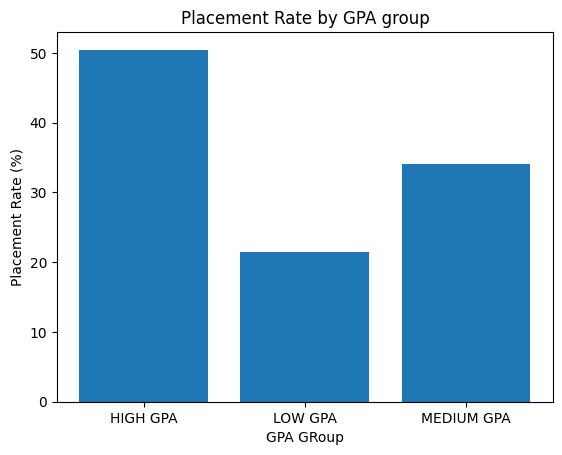

In [45]:
plt.bar(gpa_df['gpa_group'],gpa_df['placement_rate'])
plt.title("Placement Rate by GPA group")
plt.ylabel("Placement Rate (%)")
plt.xlabel("GPA GRoup")
plt.savefig("gpa_vs_placement.png")
#

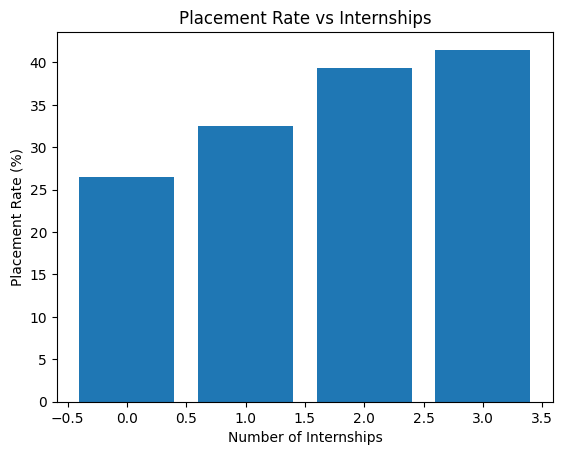

In [46]:
plt.bar(intern_df['internships'], intern_df['placement_rate'])
plt.title("Placement Rate vs Internships")
plt.xlabel("Number of Internships")
plt.ylabel("Placement Rate (%)")
plt.savefig("internships_vs_placement.png")

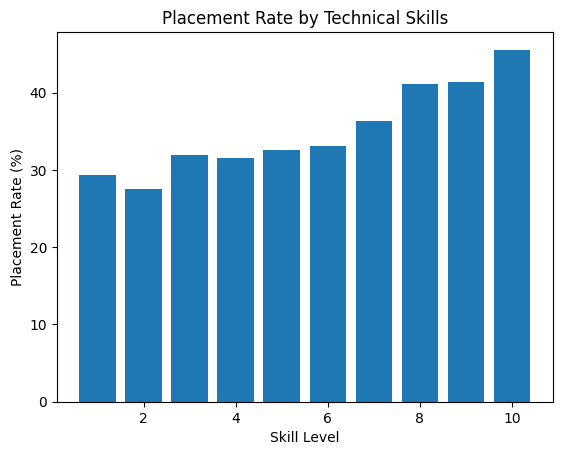

In [47]:
plt.bar(skills_df['technical_skills'], skills_df['placement_rate'])
plt.title("Placement Rate by Technical Skills")
plt.xlabel("Skill Level")
plt.ylabel("Placement Rate (%)")
plt.savefig("skills_vs_placement.png")


Key Insights

    Students with higher college GPA have significantly higher     placement rates
    
    Internship experience strongly correlates with placement       success
    
    Strong technical skills improve placement probability
    
    Projects and certifications provide a measurable advantage